### Checking the Sampling Rate, Window Size & Frequencies

In [16]:
!pip freeze > requirements.txt

Text(0, 0.5, 'AW1')

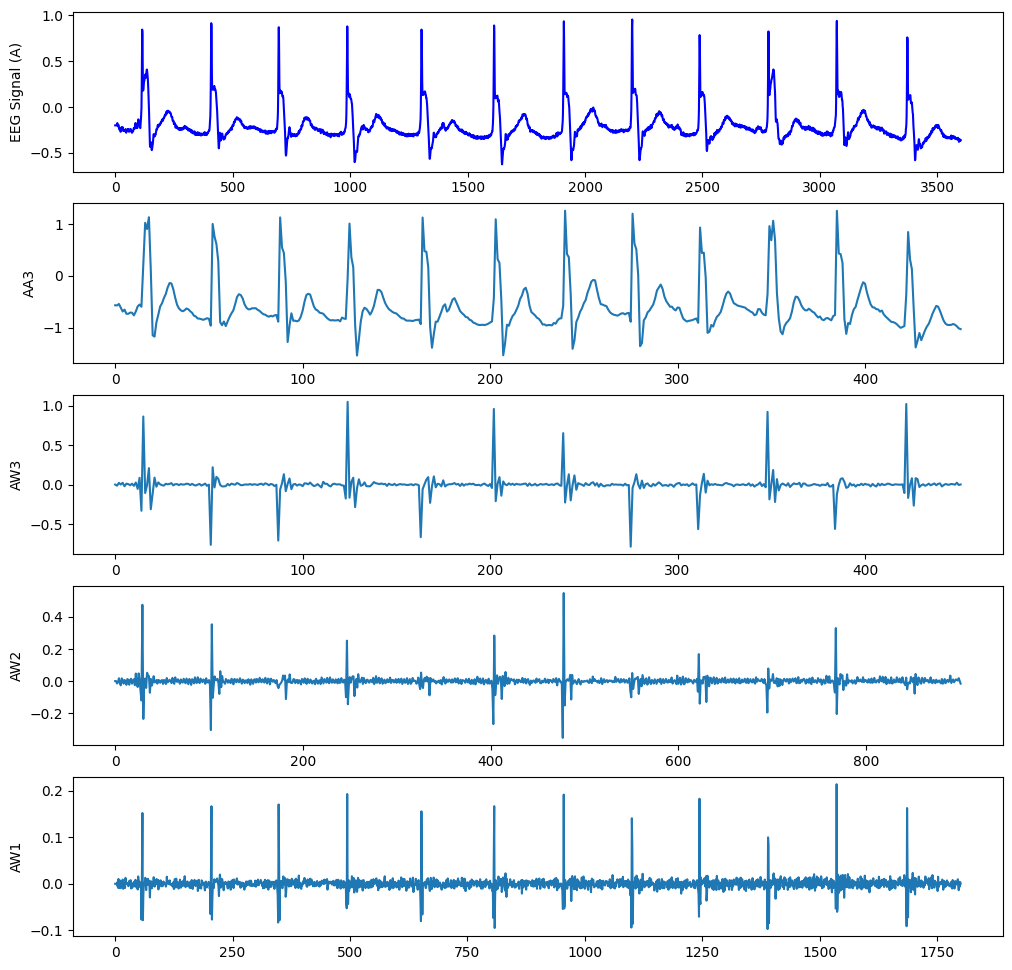

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pandas as pd
import math

data=[]
#data =  pd.read_csv('D:/PROJECTS/HPID_12/Train/Subject_Train/sagar-keypinch-1.csv')
data =  pd.read_csv('C:/Users/Pramanik/Downloads/My_learning/College_Report/ECG_signal/New_place/My_code/EDI_D1_11a-Codefile/ECG_dataset/Our_data/Input/ecg_files/physionet-ecgtrial-1.csv')
data_A = data['EKG']#.iloc[50:1500,4]
A_coeffs = pywt.wavedec(data_A, 'db2', level=3)
AA3, AW3, AW2, AW1 = A_coeffs

fig, axs = plt.subplots(5, figsize=(12,12))
axs[0].plot(data_A,'b')
axs[0].set_ylabel('EEG Signal (A)')
axs[1].plot(AA3)
axs[1].set_ylabel('AA3')
axs[2].plot(AW3)
axs[2].set_ylabel('AW3')
axs[3].plot(AW2)
axs[3].set_ylabel('AW2')
axs[4].plot(AW1)
axs[4].set_ylabel('AW1')

In [2]:
def notch_filter(x, samplerate, plot=False):
 
    x = x - np.mean(x)

    high_cutoff_notch = 49 / (samplerate / 2)
    low_cutoff_notch = 51 / (samplerate / 2)

    # Band Stop Filter (BSF) or Band Reject Filter
    [b, a] = signal.butter(4, [high_cutoff_notch, low_cutoff_notch], btype='stop')

    x_filt = signal.filtfilt(b, a, x.T)

    if plot:
        t = np.arange(0, len(x) / samplerate, 1 / samplerate)
        plt.plot(t, x)
        plt.plot(t, x_filt.T, 'k')
        plt.legend(['Original', 'Filtered'], loc = 'best')
        plt.autoscale(tight=True)
        plt.xlabel('Time')
        plt.ylabel('Amplitude (mV)')
        plt.show()

    return x_filt


def bp_filter(x, low_f, high_f, samplerate, plot=False):
    # x = x - np.mean(x)

    low_cutoff_bp = low_f / (samplerate / 2)
    high_cutoff_bp = high_f / (samplerate / 2)

    [b, a] = signal.butter(5, [low_cutoff_bp, high_cutoff_bp], btype='bandpass')

    x_filt = signal.filtfilt(b, a, x)
    #print(len(x))

    if plot:
        t = np.arange(0, len(x.transpose()) / samplerate, 1 / samplerate)
        plt.plot(t, x.transpose())
        plt.plot(t, x_filt.transpose(), 'k')
        plt.legend(['Original', 'Filtered'], loc = 'best')
        plt.autoscale(tight=True)
        plt.xlabel('Time')
        plt.ylabel('Amplitude (mV)')
        plt.show()

    return x_filt

In [3]:
def plot_freq_band (data_in):
    fs = 512                               # Sampling rate (512 Hz)
    # Get real amplitudes of FFT (only in postive frequencies)
    fft_vals = np.absolute(np.fft.rfft(data_in))
    
    # Get frequencies for amplitudes in Hz
    fft_freq = np.fft.rfftfreq(len(data_in), 1.0/fs)
    #print(fft_freq)
    # Define EEG bands
    eeg_bands = {' 0 - 10Hz': (0, 10),
                 '11 - 20Hz': (11, 20),
                 '21 - 30Hz': (21, 30),
                 '31 - 40Hz': (31, 40),
                 '41 - 50Hz': (41, 50)}
                # '45 to 100 Hz':(45,100),
                 #'101 to 200 Hz':(101,200)}

    # Take the mean of the fft amplitude for each EEG band
    eeg_band_fft = dict()
    for band in eeg_bands:  
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                           (fft_freq <= eeg_bands[band][1]))[0]
        eeg_band_fft[band] = np.mean(fft_vals[freq_ix])

    # Plot the data (using pandas here cause it's easy)
    import pandas as pd
    df = pd.DataFrame(columns=['band', 'val'])
    df['band'] = eeg_bands.keys()
    df['val'] = [eeg_band_fft[band] for band in eeg_bands]
    ax = df.plot.bar(x='band', y='val', legend=False)
    ax.set_xlabel("EEG band")
    ax.set_ylabel("Mean band Amplitude")

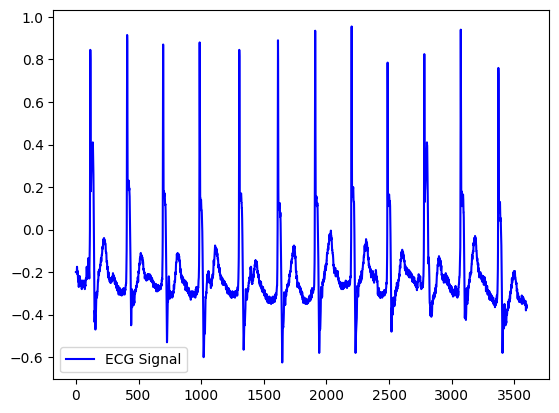

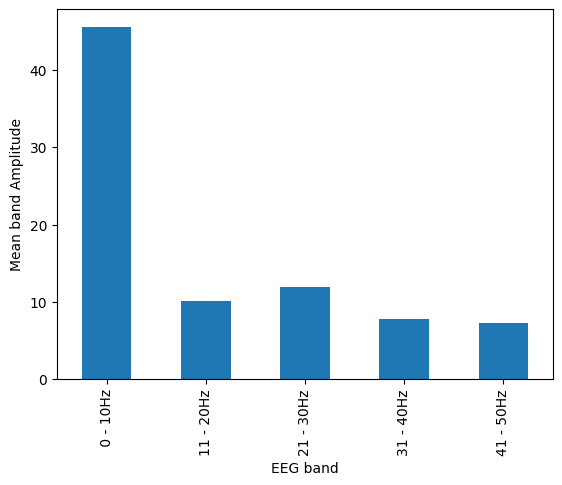

In [4]:
import scipy
import scipy.signal
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

#data_A = data.iloc[3000:5799,2]
plt.clf()
plt.plot(data_A,'b')
plt.legend(['ECG Signal'], loc = 'best')
plot_freq_band (data_A)
#plt.clf()


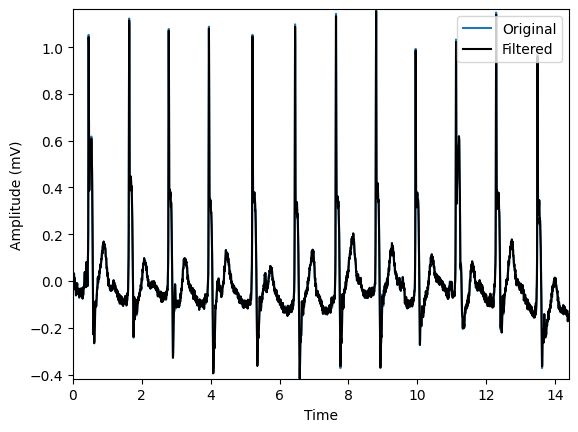

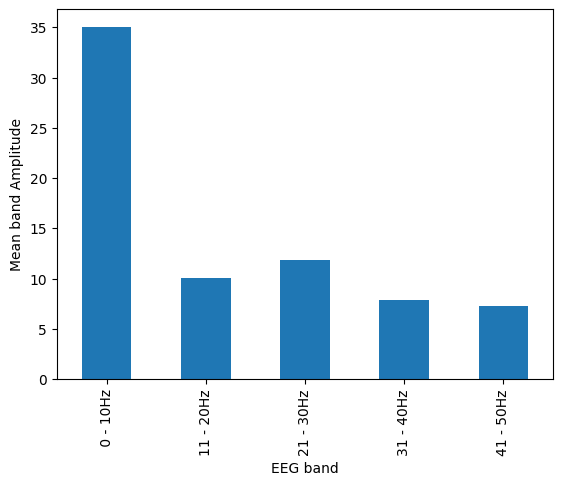

In [5]:
notch_out = notch_filter(data_A, samplerate=250, plot=True)
#plt.clf()
plot_freq_band (notch_out)
#plt.clf()

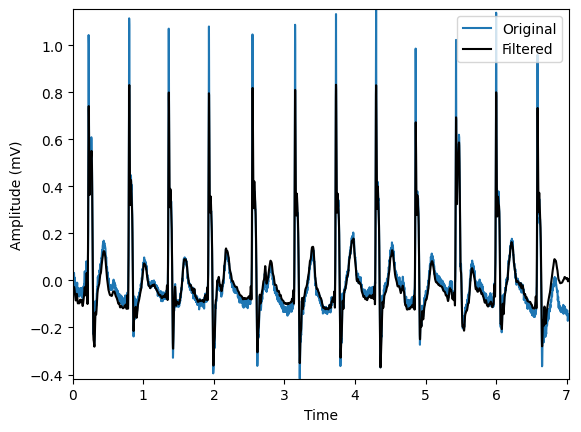

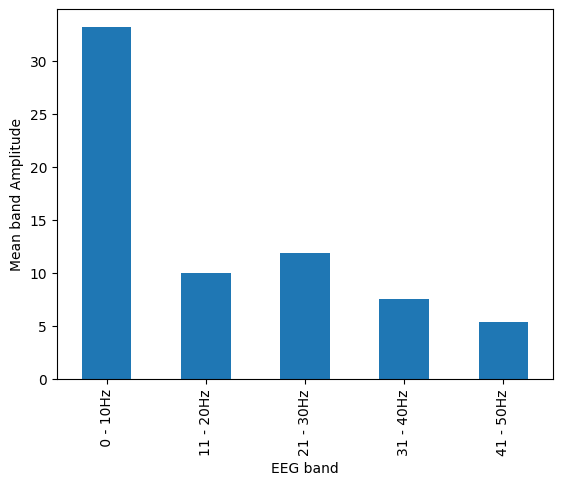

In [6]:
bp_out =  bp_filter(notch_out, low_f=0.5, high_f=50, samplerate=512, plot=True)
#plt.clf()
plot_freq_band (bp_out)

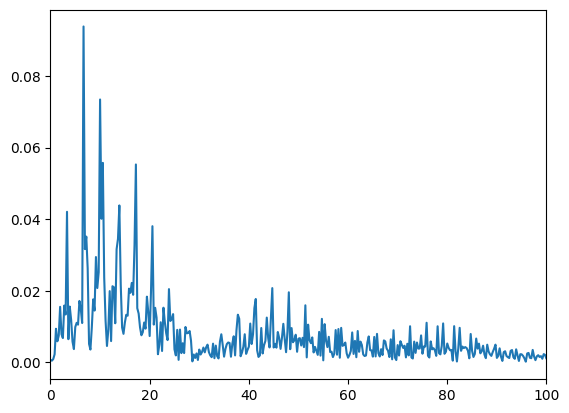

In [7]:
#Power spectral density
from scipy.fftpack import fft, fftfreq
import matplotlib.pyplot as plt
x= bp_out
dt = 0.001
#X = fft(x)
X=fft(x)/len(x)
freq = fftfreq(x.size, d=dt)

# Only keep positive frequencies.
keep = freq>=0
#X = X[keep]
X=X[keep]*2
freq = freq[keep]

ax1 = plt.subplot(111)
ax1.plot(freq, np.absolute(X))#/3000.)
ax1.set_xlim(0,100)

plt.show()

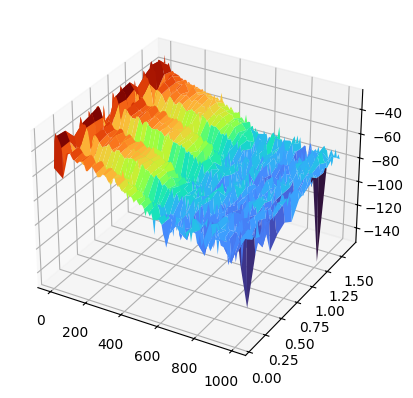

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal # spectrogram function
from matplotlib import cm # colour map

mysignal =data.iloc[:,1] # CHANGE THE SIGNAL AND SEE PLOT

# basic config
sample_rate = 2000 #11240.  # 
sig_len_secs = 10
frequency = 2000.

# generate thetimepoint
timestamps_secs = np.arange(sample_rate*sig_len_secs) / sample_rate


# extract the spectrum
freq_bins, timestamps, spec = signal.spectrogram(mysignal, sample_rate)

# 3d plot

fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = plt.subplot(1,1,1,projection="3d"); 
ax.plot_surface(freq_bins[:, None], timestamps[None, :], 10.0*np.log10(spec), cmap=cm.turbo)
plt.show()


(1899,)


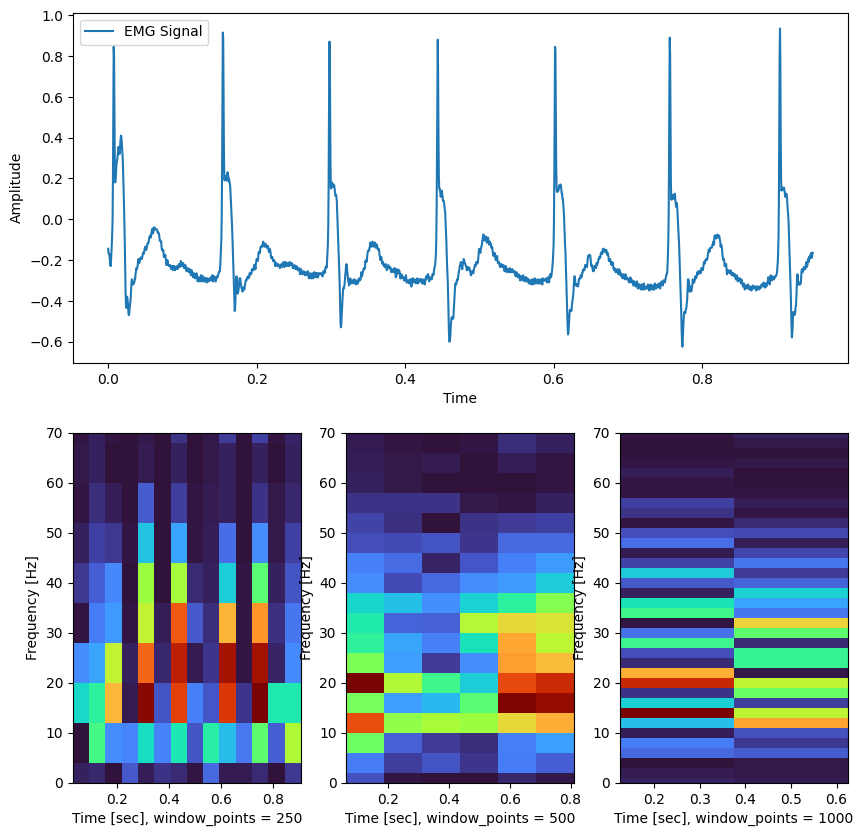

In [9]:
#https://stackoverflow.com/questions/72181057/what-is-the-ideal-parameters-for-spectrogram-of-eeg-signal
#Windowing of signal for analysis and discussion of no of datapoints 
# We clim 500 to be the ideal number of data points 
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

#y_data = np.genfromtxt('signal_value_spectro.csv', delimiter=',',skip_header=0)

Oz=data['EKG'].iloc[100:1999]#
fs = 2000
t = np.arange(len(Oz))/fs

print(t.shape)

nperseg=250
f250, t250, Sxx_250 = signal.spectrogram(Oz, fs, nperseg=nperseg ,noverlap=nperseg//2,window=signal.get_window('hann',nperseg))
nperseg=500
f500, t500, Sxx_500 = signal.spectrogram(Oz, fs, nperseg=nperseg , noverlap=nperseg//2,window=signal.get_window('hann',nperseg))
nperseg=1000
f1000, t1000, Sxx_1000 = signal.spectrogram(Oz, fs, nperseg=nperseg ,noverlap=nperseg//2,window=signal.get_window('hann',nperseg))
#50% OVERLAP FOR ALL 3 
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(np.arange(len(Oz))/fs,Oz)  
plt.legend(['EMG Signal'], loc = 'best')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.subplot(234)
plt.pcolormesh(t250, f250, Sxx_250, shading='auto',cmap = 'turbo')
plt.ylim([0,70])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec], window_points = 250')
plt.subplot(235)
plt.pcolormesh(t500, f500, Sxx_500, shading='auto',cmap = 'turbo')
plt.ylim([0,70])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec], window_points = 500')
plt.subplot(236)
plt.pcolormesh(t1000, f1000, Sxx_1000, shading='auto',cmap = 'turbo')
plt.ylim([0,70])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec], window_points = 1000')


plt.show()

(1899,)


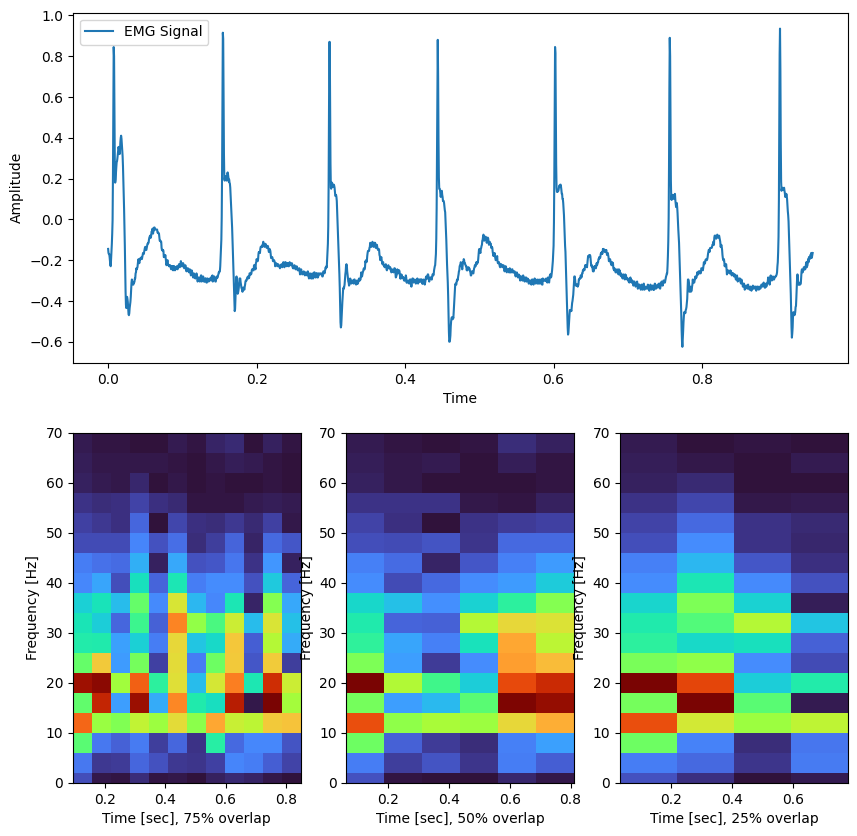

In [10]:
#https://stackoverflow.com/questions/72181057/what-is-the-ideal-parameters-for-spectrogram-of-eeg-signal
#  overlapping of signal analysis and discussion of lenght of overlapping window
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

#y_data = np.genfromtxt('signal_value_spectro.csv', delimiter=',',skip_header=0)

Oz=data['EKG'].iloc[100:1999]#
fs = 2000
t = np.arange(len(Oz))/fs

print(t.shape)

nperseg=500
f250, t250, Sxx_250 = signal.spectrogram(Oz, fs, nperseg=nperseg ,noverlap=nperseg//1.334,window=signal.get_window('hann',nperseg))
nperseg=500
f500, t500, Sxx_500 = signal.spectrogram(Oz, fs, nperseg=nperseg , noverlap=nperseg//2,window=signal.get_window('hann',nperseg))
nperseg=500
f1000, t1000, Sxx_1000 = signal.spectrogram(Oz, fs, nperseg=nperseg ,noverlap=nperseg//4,window=signal.get_window('hann',nperseg))
#ALL 3 have  500 Datapoints 
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(np.arange(len(Oz))/fs,Oz)  
plt.legend(['EMG Signal'], loc = 'best')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.subplot(234)
plt.pcolormesh(t250, f250, Sxx_250, shading='auto',cmap = 'turbo')
plt.ylim([0,70])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec], 75% overlap')
plt.subplot(235)
plt.pcolormesh(t500, f500, Sxx_500, shading='auto',cmap = 'turbo')
plt.ylim([0,70])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec], 50% overlap')
plt.subplot(236)
plt.pcolormesh(t1000, f1000, Sxx_1000, shading='auto',cmap = 'turbo')
plt.ylim([0,70])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec], 25% overlap')


plt.show()

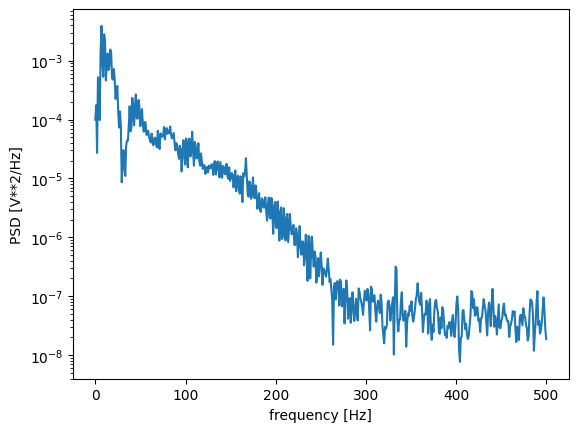

In [11]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html
# default Hann window an overlap of 50% 
#Compute and plot the power spectral density.
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()
fs = 1000
x=data['EKG'].iloc[100:2999]
f, Pxx_den = signal.welch(x, fs, nperseg=1024)
plt.semilogy(f, Pxx_den)
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

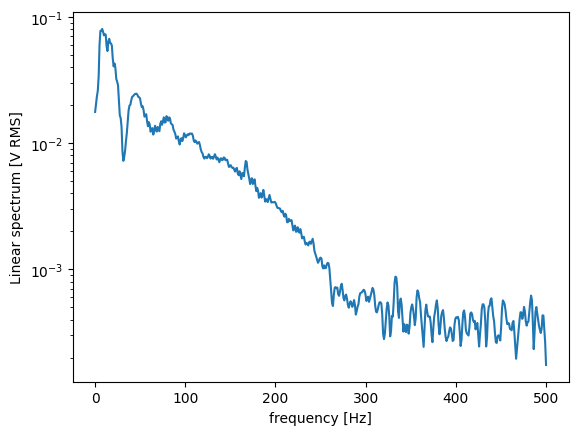

In [12]:
#compute and plot the power spectrum.
f, Pxx_spec = signal.welch(x, fs, 'flattop', 1024, scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()